**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('/content/drive/MyDrive/KT_5mini/churn_data.csv')

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop('customerID', axis=1)

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df1['TotalCharges'].dtype

dtype('O')

In [ ]:
df1['TotalCharges'] = df1['TotalCharges'].replace(' ', 0)
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

df2 = df1.copy()

In [ ]:
df2['TotalCharges'].dtype

dtype('float64')

<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [ ]:
df2['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
# 여기에 답안코드를 작성하세요.
df2['Churn'] = df2['Churn'].replace({'Yes': 1, 'No': 0})

df3 = df2.copy()

In [ ]:
df3['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df3.isnull().mean()*100

gender               0.127786
SeniorCitizen        0.014198
Partner              0.000000
Dependents           0.028397
tenure               0.000000
PhoneService         0.042595
MultipleLines        0.000000
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup         0.000000
DeviceProtection    49.169388
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract             0.014198
PaperlessBilling     0.000000
PaymentMethod        0.014198
MonthlyCharges       0.014198
TotalCharges         0.000000
Churn                0.000000
dtype: float64

In [ ]:
df3.drop('DeviceProtection', axis=1, inplace=True)

In [ ]:
df3.dropna(inplace=True)

In [ ]:
df4 = df3.copy()

In [ ]:
df4.isnull().mean()*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요.
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

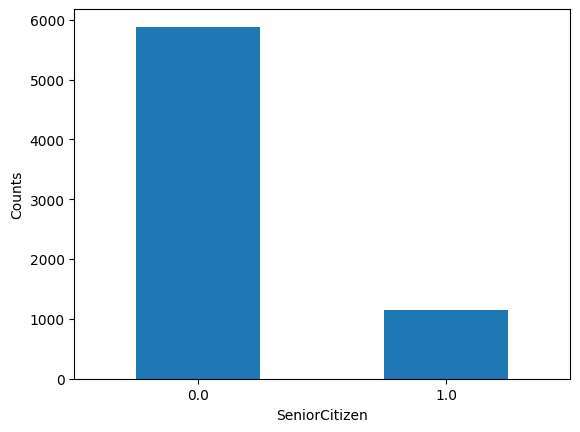

In [ ]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt

# SeniorCitizen 컬럼의 값에 따른 빈도수를 바 차트로 표시
df4['SeniorCitizen'].value_counts().plot(kind='bar')
plt.xlabel('SeniorCitizen')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # x축 레이블을 수평으로 설정
plt.show()

In [ ]:
df4.drop('SeniorCitizen', axis=1, inplace=True)

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-89-6c0f97dddba7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df4, x='tenure', hue='Churn', shade=True)


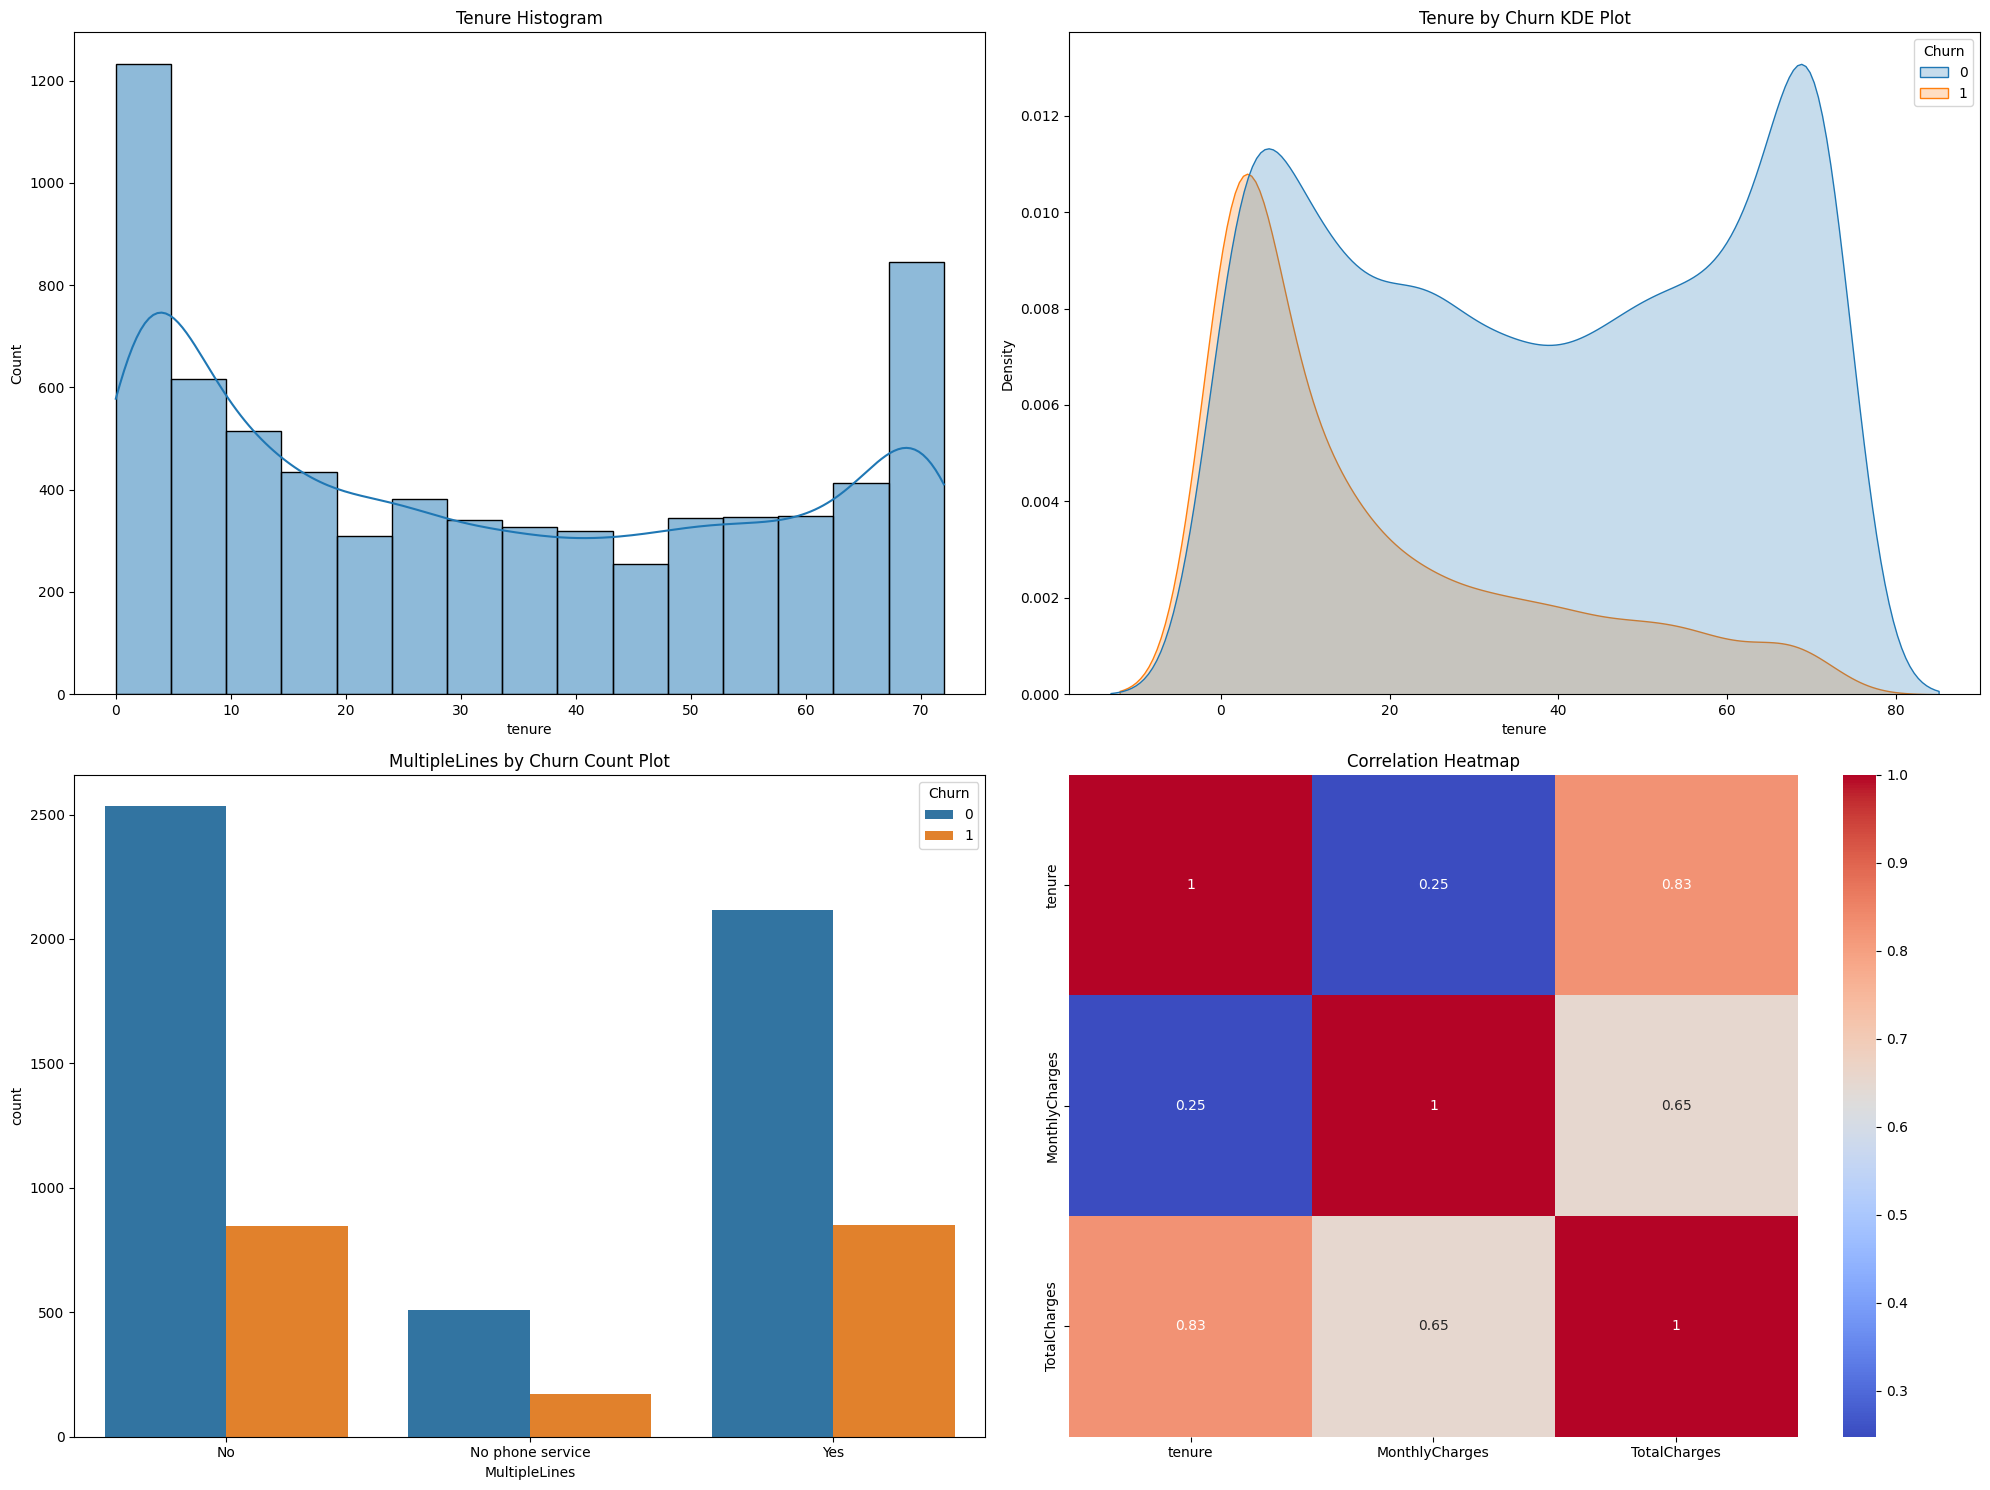

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.histplot(data=df4, x='tenure', kde=True)
plt.title('Tenure Histogram')

plt.subplot(2, 2, 2)
sns.kdeplot(data=df4, x='tenure', hue='Churn', shade=True)
plt.title('Tenure by Churn KDE Plot')

plt.subplot(2, 2, 3)
sns.countplot(data=df4, x='MultipleLines', hue='Churn')
plt.title('MultipleLines by Churn Count Plot')

plt.subplot(2, 2, 4)
corr = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
max_corr_value = np.max(corr.values[np.triu_indices_from(corr.values,1)])
print(f"가장 높은 상관계수 값: {max_corr_value:.2f}")

가장 높은 상관계수 값: 0.83


<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
object_cols = df4.select_dtypes(include=['object']).columns
df5 = pd.get_dummies(df4, columns=object_cols)

In [ ]:
df5.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5,8,99.65,820.50,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False


<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
X = df5.drop('Churn', axis=1)
y = df5['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5621, 41), (1406, 41), (5621,), (1406,))

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요.
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.(LogisticRegression)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_s, y_train)

lr_model.score(X_valid_s, y_valid)

0.7930298719772404

In [ ]:
# 여기에 답안코드를 작성하세요.(KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_s, y_train)

knn_model.score(X_valid_s, y_valid)

0.7567567567567568

In [ ]:
# 여기에 답안코드를 작성하세요.(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_s, y_train)

dt_model.score(X_valid_s, y_valid)

0.7617354196301565

In [ ]:
# 여기에 답안코드를 작성하세요.(RandomForest)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=3, random_state=42)
rf_model.fit(X_train_s, y_train)

rf_model.score(X_valid_s, y_valid)

0.7467994310099573

In [ ]:
# 여기에 답안코드를 작성하세요.(XgBoost)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=3, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_s, y_train)

xgb_model.score(X_valid_s, y_valid)

0.7930298719772404

In [ ]:
# 여기에 답안코드를 작성하세요.(lightgbm)
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=3, random_state=42)
lgbm_model.fit(X_train_s, y_train)

lgbm_model.score(X_valid_s, y_valid)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


0.7347083926031295

### 14. 바로 위 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
y_pred = xgb_model.predict(X_valid_s)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_valid, y_pred)

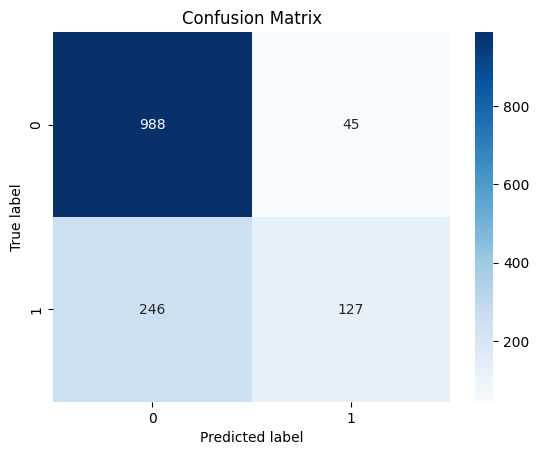

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1033
           1       0.74      0.34      0.47       373

    accuracy                           0.79      1406
   macro avg       0.77      0.65      0.67      1406
weighted avg       0.78      0.79      0.76      1406



##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_s.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               5376      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [ ]:
# 모델 학습
history = model.fit(X_train_s,
                    y_train,
                    epochs=10,
                    batch_size=16,
                    validation_data=(X_valid_s, y_valid))

Epoch 1/10
352/352 [==============================] - 7s 9ms/step - loss: 0.4708 - accuracy: 0.7685 - val_loss: 0.4451 - val_accuracy: 0.7859
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 0.4388 - accuracy: 0.7947 - val_loss: 0.4359 - val_accuracy: 0.7895
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 0.4341 - accuracy: 0.7974 - val_loss: 0.4326 - val_accuracy: 0.7866
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 0.4278 - accuracy: 0.8045 - val_loss: 0.4309 - val_accuracy: 0.7895
Epoch 5/10
352/352 [==============================] - 3s 9ms/step - loss: 0.4242 - accuracy: 0.8095 - val_loss: 0.4316 - val_accuracy: 0.7937
Epoch 6/10
352/352 [==============================] - 4s 12ms/step - loss: 0.4207 - accuracy: 0.8073 - val_loss: 0.4238 - val_accuracy: 0.7923
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.4155 - accuracy: 0.8082 - val_loss: 0.4398 - val_accuracy: 0.7909
Epoch

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

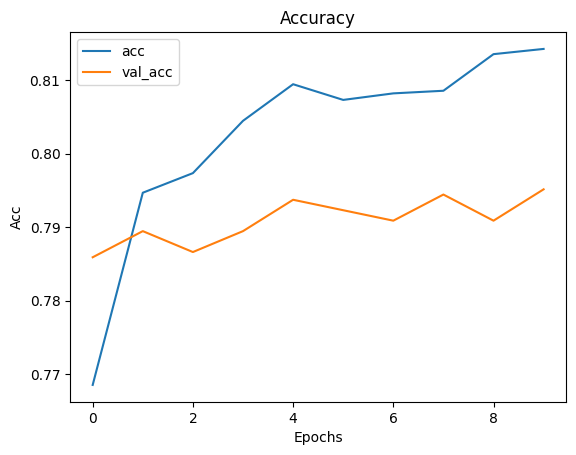

In [ ]:
# 여기에 답안코드를 작성하세요.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#epochs = range(1, len(acc) + 1)

plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()
